# Construção do modelo
Nesta seção abordaremos a construção de um modelo de precificação dos jogadores

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pl_transfers = pd.read_csv('data/pl_transfers.csv')

In [3]:
from sklearn.linear_model import LinearRegression
df_encoded = pd.get_dummies(pl_transfers, columns=['playerPos'])

X = df_encoded[['playerAge', 'playerPos_GK', 'playerPos_CF', 'playerPos_LB', 'playerPos_CM', 'playerPos_CB', 'playerPos_RW', 'playerPos_DM', 'playerPos_LW', 'playerPos_RB', 'playerPos_AM', 'playerPos_SS', 'playerPos_RM', 'playerPos_LM']]
y = pl_transfers['transferFee']

model = LinearRegression()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)


LinearRegression()

In [4]:
df_encoded = pd.get_dummies(pl_transfers, columns=['playerPos'])

df_encoded

,playerName,playerLink,playerAge,playerCountry,playerMarketValue,transferFee,clubLeft,clubLeftUrl,clubJoined,clubJoinedUrl,...,playerPos_CM,playerPos_DM,playerPos_GK,playerPos_LB,playerPos_LM,playerPos_LW,playerPos_RB,playerPos_RM,playerPos_RW,playerPos_SS
0,Joe Murphy,/joe-murphy/profil/spieler/3655,20,Ireland,50000,250000,Tranmere Rovers,/tranmere-rovers/startseite/verein/1074,West Bromwich Albion,/west-bromwich-albion/startseite/verein/984,...,0,0,1,0,0,0,0,0,0,0
1,Cristiano Ronaldo,/cristiano-ronaldo/profil/spieler/8198,18,Portugal,15000000,19000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Manchester United,/manchester-united/startseite/verein/985,...,0,0,0,0,0,0,0,0,0,0
2,Gaël Clichy,/gael-clichy/profil/spieler/7449,18,France,100000,375000,AS Cannes,/as-cannes/startseite/verein/895,Arsenal FC,/fc-arsenal/startseite/verein/11,...,0,0,0,1,0,0,0,0,0,0
3,Scott Carson,/scott-carson/profil/spieler/14555,19,England,200000,1400000,Leeds United,/leeds-united/startseite/verein/399,Liverpool FC,/fc-liverpool/startseite/verein/31,...,0,0,1,0,0,0,0,0,0,0
4,James Milner,/james-milner/profil/spieler/3333,18,England,1500000,7400000,Leeds United,/leeds-united/startseite/verein/399,Newcastle United,/newcastle-united/startseite/verein/762,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Pedro Porro,/pedro-porro/profil/spieler/553875,23,Spain,40000000,45000000,Sporting CP,/sporting-lissabon/startseite/verein/336,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,...,0,0,0,0,0,0,1,0,0,0
1667,Dejan Kulusevski,/dejan-kulusevski/profil/spieler/431755,23,Sweden,50000000,30000000,Juventus FC,/juventus-turin/startseite/verein/506,Tottenham Hotspur,/tottenham-hotspur/startseite/verein/148,...,0,0,0,0,0,0,0,0,1,0
1668,Arthur Masuaku,/arthur-masuaku/profil/spieler/181380,29,DR Congo,6000000,2000000,West Ham United,/west-ham-united/startseite/verein/379,Besiktas JK,/besiktas-istanbul/startseite/verein/114,...,0,0,0,1,0,0,0,0,0,0
1669,Boubacar Traoré,/boubacar-traore/profil/spieler/649020,21,Mali,5000000,11000000,FC Metz,/fc-metz/startseite/verein/347,Wolverhampton Wanderers,/wolverhampton-wanderers/startseite/verein/543,...,0,1,0,0,0,0,0,0,0,0


In [5]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2

0.017926043208572495

## Modelo com dados fbref

In [6]:
df = pd.read_csv('data/pl_transfers_fbref_data.csv')

df.columns

Index(['playerName', 'playerLink', 'playerAge', 'playerPos', 'playerCountry',
       'playerMarketValue', 'transferFee', 'clubLeft', 'clubLeftUrl',
       'clubJoined', 'clubJoinedUrl', 'teamTransferType', 'season',
       'valuation', 'currAge', 'height', 'foot', 'league', 'team', 'player',
       'nation', 'pos', 'age', 'born', 'Playing Time_MP',
       'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s',
       'Performance_Gls', 'Performance_Ast', 'Performance_G+A',
       'Performance_G-PK', 'Performance_PK', 'Performance_PKatt',
       'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG',
       'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC',
       'Progression_PrgP', 'Progression_PrgR', 'Per 90 Minutes_Gls',
       'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK',
       'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG',
       'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG',

Removendo colunas inúteis

In [7]:
del df['valuation']
del df['currAge']
del df['age']
del df['born']
del df['playerMarketValue']

/tmp/ipykernel_761201/1235175222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


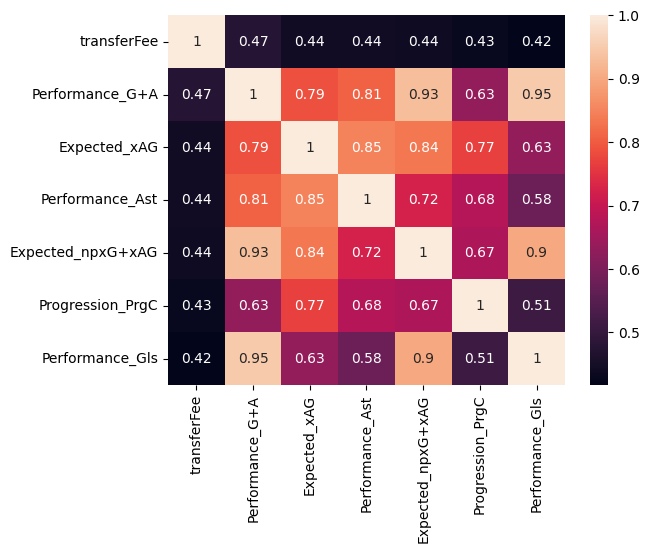

In [20]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['transferFee']
correlation_sorted = correlation_with_target.abs().sort_values(ascending=False)
# Defina um limiar para selecionar apenas as colunas com correlação acima de um determinado valor
correlation_threshold = 0.4

# Selecione as colunas com correlação acima do limiar
best_columns = correlation_sorted[correlation_sorted > correlation_threshold].index.tolist()

# Plotar um mapa de calor da matriz de correlação
import seaborn as sns

# Calcular a matriz de correlação
correlation_matrix = df[best_columns].corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [22]:
best_columns = best_columns[1:]
best_columns

# Dividir o DataFrame em atributos (X) e rótulo (y) usando apenas as melhores colunas
X = df[best_columns]
y = df['transferFee']

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Criar uma instância do modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo usando o erro médio quadrático (RMSE)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(r2)

0.3679906415185783
